# Study of the properties of 3 different Iris flowers 

Irises are wonderful garden plants. The word Iris means rainbow. Irises come in many colors such as blue and purple, white and yellow, pink and orange, brown and red, and even black.
The genus Iris has about 200 species and is native to the North Temperate regions of the world. The habitat of irises also varies a lot. Some irises grow in deserts, some in swamps, some in the cold far north, and many in temperate climates. Bearded Iris and Siberian Iris are two of the most common types of irises grown.
Kingdom - Plantae
Division - Magnoliophyta
Class - Liliopsida
Order - Asparagales
Family - Iridaceae
Genus - Iris

Source - http://www.theflowerexpert.com/content/mostpopularflowers/morepopularflowers/iris

# Data Information

Source of Data - https://www.kaggle.com/chuckyin/iris-datasets


# Questions 

1. What is the relation between the four properties, namely petal length, petal width, sepal length and sepal width ?
2. What is the relation between the four properties and the type of flower (i.e. Iris-setosa, Iris-versicolor, Iris-virginica) ?

# Data Analysis

In [106]:
# importing differnt python packages used for analysing the given data.


import pandas as pd                           # for importing data
import matplotlib.pyplot as plt               # for data visualization 
import statistics                             # for statistical calculation
import numpy as np
from scipy.interpolate import UnivariateSpline
from scipy.optimize import curve_fit
from tabulate import tabulate

In [14]:
# importing the data 

a = pd.read_csv("C:\\Users\\dell\\Desktop\\Iris.csv")    
a.head(150)

# storing data in specific dataframes for efficiently accessing the data

sepel_length = a[:]["SepalLengthCm"]
sepel_width = a[:]["SepalWidthCm"]
petal_length = a[:]["PetalLengthCm"]
petal_width = a[:]["PetalWidthCm"]
species = a[:]["Species"]

In [7]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 6.5+ KB


# 1. What is the relation between the four properties, namely petal length, petal        width, sepal length and sepal width ?

### Relation between sepal length and sepal width

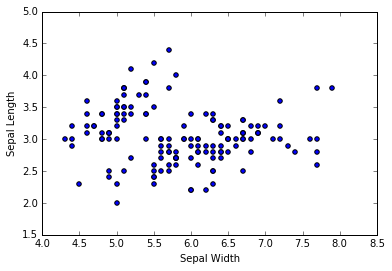

In [15]:
plt.scatter(sepel_length,sepel_width)                   
plt.ylabel("Sepal Length")
plt.xlabel("Sepal Width")
plt.show() 

### Relation between petal length and petal width


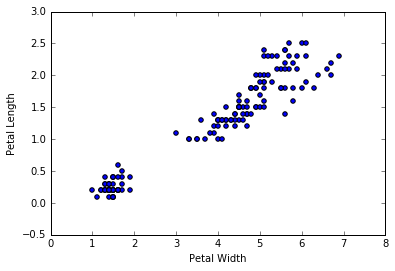

In [16]:
plt.scatter(petal_length, petal_width)
plt.ylabel("Petal Length")
plt.xlabel("Petal Width")
plt.show()

### Relation between Sepal Length and Petal Length

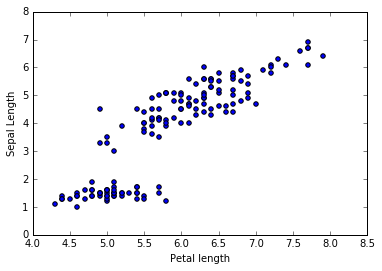

In [127]:
plt.scatter(sepel_length, petal_length)
plt.ylabel("Sepal Length")
plt.xlabel("Petal length")
plt.show()

### Relation between Sepal Width and Petal Width 

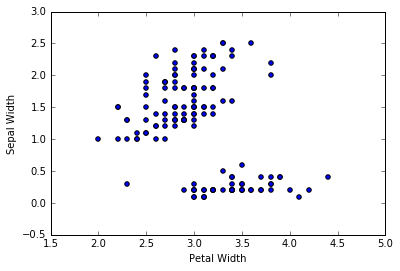

In [128]:
plt.scatter(sepel_width, petal_width)
plt.ylabel("Sepal Width")
plt.xlabel("Petal Width")
plt.show()

## Analysis of the relation between the four parameters 

From the above scatterplots, we find that there seems to be a linear relationship between petal length and petal width and also between sepal length and petal length to a certain extent. No such relationship can be found between sepal length and petal length and between sepal width and petal width.

# 2. What is the relation between the four properties and the type of flower (i.e. Iris-setosa, Iris-versicolor, Iris-virginica) ?

### Relation between Sepal length and Iris-setosa

Mean :  5.006
Median :  5.0
Variance :  0.121764
Standard Deviation :  0.348946987378
5.1    8
5.0    8
5.4    5
4.8    5
4.6    4
4.9    4
4.4    3
5.2    3
5.7    2
4.7    2
5.5    2
5.3    1
5.8    1
4.3    1
4.5    1
Name: SepalLengthCm, dtype: int64


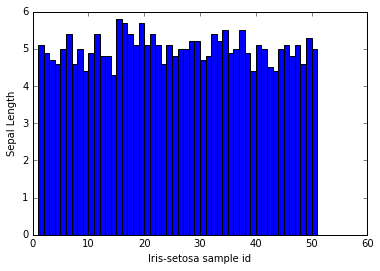

In [150]:
q=a.loc[a['Species'] == "Iris-setosa"]
print("Mean : ",statistics.mean(q["SepalLengthCm"]))
print("Median : ",statistics.median(q["SepalLengthCm"]))
s=0
for i in q["SepalLengthCm"]:
    s=s+pow((i-statistics.mean(q["SepalLengthCm"])),2)
print("Variance : ",(s/50))
print("Standard Deviation : ",pow((s/50),0.5))
print(q["SepalLengthCm"].value_counts())
xx=[x for x in range(1,51)]
plt.bar(xx,q["SepalLengthCm"],width=1,color="blue")
plt.ylabel("Sepal Length")
plt.xlabel("Iris-setosa sample id")
plt.show()

As we can see from the above information, the mean sepal length is 5.006 cm, median sepal length is 5.0 cm. Since it is bimodal, the modal lengths are 5.1 cm and 5.0 cm.  

### Relation between Sepal width and Iris-setosa

Mean :  3.418
Median :  3.4
Mode :  3.4
Variance :  0.142276
Standard Deviation :  0.377194909828
3.4    9
3.0    6
3.5    6
3.1    5
3.2    5
3.8    4
3.7    3
3.6    2
3.9    2
3.3    2
2.9    1
2.3    1
4.1    1
4.4    1
4.2    1
4.0    1
Name: SepalWidthCm, dtype: int64


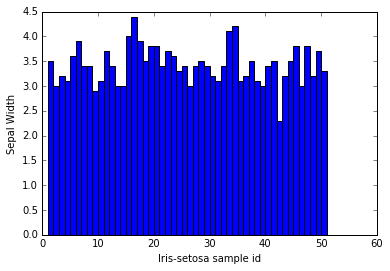

In [151]:
q=a.loc[a['Species'] == "Iris-setosa"]
print("Mean : ",statistics.mean(q["SepalWidthCm"]))
print("Median : ",statistics.median(q["SepalWidthCm"]))
print("Mode : ",statistics.mode(q["SepalWidthCm"]))
s=0
for i in q["SepalWidthCm"]:
    s=s+pow((i-statistics.mean(q["SepalWidthCm"])),2)
print("Variance : ",(s/50))
print("Standard Deviation : ",pow((s/50),0.5))
print(q["SepalWidthCm"].value_counts())
xx=[x for x in range(1,51)]	
plt.bar(xx,q["SepalWidthCm"],width=1,color="blue")
plt.ylabel("Sepal Width")
plt.xlabel("Iris-setosa sample id")
plt.show()

As we can see from the above information, the mean sepal width is 3.418 cm, median sepal width is 3.4 cm and the modal length is 3.4 cm. 

### Relation between Petal length and Iris-setosa

Mean :  1.464
Median :  1.5
Mode :  1.5
Variance :  0.029504
Standard Deviation :  0.171767284429
1.5    14
1.4    12
1.3     7
1.6     7
1.7     4
1.2     2
1.9     2
1.1     1
1.0     1
Name: PetalLengthCm, dtype: int64


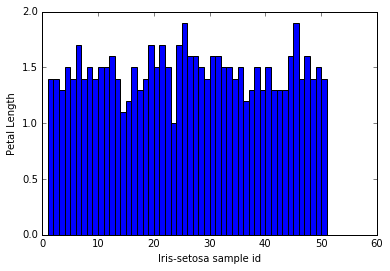

In [152]:
q=a.loc[a['Species'] == "Iris-setosa"]
print("Mean : ",statistics.mean(q["PetalLengthCm"]))
print("Median : ",statistics.median(q["PetalLengthCm"]))
print("Mode : ",statistics.mode(q["PetalLengthCm"]))
s=0
for i in q["PetalLengthCm"]:
    s=s+pow((i-statistics.mean(q["PetalLengthCm"])),2)
print("Variance : ",(s/50))
print("Standard Deviation : ",pow((s/50),0.5))
print(q["PetalLengthCm"].value_counts())
xx=[x for x in range(1,51)]	
plt.bar(xx,q["PetalLengthCm"],width=1,color="blue")
plt.ylabel("Petal Length")
plt.xlabel("Iris-setosa sample id")
plt.show()

As we can see from the above information, the mean sepal width is 1.464 cm, median sepal width is 1.5 cm and the modal length is 3.4 cm.

### Relation between Petal width and Iris-setosa

Mean :  0.244
Median :  0.2
Mode :  0.2
Variance :  0.011264
Standard Deviation :  0.106131993291
0.2    28
0.4     7
0.3     7
0.1     6
0.6     1
0.5     1
Name: PetalWidthCm, dtype: int64


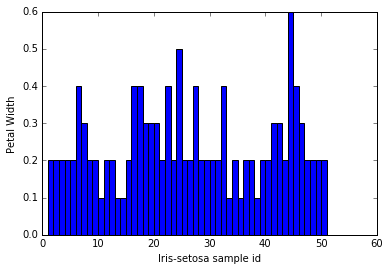

In [153]:
q=a.loc[a['Species'] == "Iris-setosa"]
print("Mean : ",statistics.mean(q["PetalWidthCm"]))
print("Median : ",statistics.median(q["PetalWidthCm"]))
print("Mode : ",statistics.mode(q["PetalWidthCm"]))
s=0
for i in q["PetalWidthCm"]:
    s=s+pow((i-statistics.mean(q["PetalWidthCm"])),2)
print("Variance : ",(s/50))
print("Standard Deviation : ",pow((s/50),0.5))
print(q["PetalWidthCm"].value_counts())
xx=[x for x in range(1,51)]	
plt.bar(xx,q["PetalWidthCm"],width=1,color="blue")
plt.ylabel("Petal Width")
plt.xlabel("Iris-setosa sample id")
plt.show()

As we can see from the above information, the mean sepal width is 0.244 cm, median sepal width is 0.2 cm and the modal length is 0.2 cm.

### Relation between Sepal length and Iris-versicolor

Mean :  5.936
Median :  5.9
Variance :  0.261104
Standard Deviation :  0.510983365678
5.5    5
5.7    5
5.6    5
6.1    4
6.0    4
6.7    3
5.8    3
6.3    3
5.9    2
5.0    2
6.4    2
6.6    2
6.2    2
6.5    1
5.2    1
4.9    1
6.8    1
5.4    1
5.1    1
6.9    1
7.0    1
Name: SepalLengthCm, dtype: int64


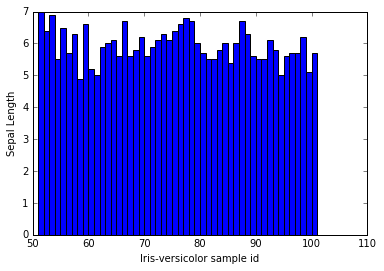

In [154]:
q=a.loc[a['Species'] == "Iris-versicolor"]
print("Mean : ",statistics.mean(q["SepalLengthCm"]))
print("Median : ",statistics.median(q["SepalLengthCm"]))
s=0
for i in q["SepalLengthCm"]:
    s=s+pow((i-statistics.mean(q["SepalLengthCm"])),2)
print("Variance : ",(s/50))
print("Standard Deviation : ",pow((s/50),0.5))
print(q["SepalLengthCm"].value_counts())
xx=[x for x in range(51,101)]
plt.bar(xx,q["SepalLengthCm"],width=1,color="blue")
plt.ylabel("Sepal Length")
plt.xlabel("Iris-versicolor sample id")
plt.show()

As we can see from the above information, the mean sepal length is 5.936 cm, median sepal length is 5.9 cm. Since it is trimodal, the modal lengths are 5.5 cm, 5.6 cm and 5.7 cm.

### Relation between Sepal width and Iris-versicolor

Mean :  2.77
Median :  2.8
Mode :  3.0
Variance :  0.0965
Standard Deviation :  0.31064449134
3.0    8
2.9    7
2.8    6
2.7    5
2.5    4
2.6    3
3.1    3
2.4    3
3.2    3
2.3    3
2.2    2
3.4    1
3.3    1
2.0    1
Name: SepalWidthCm, dtype: int64


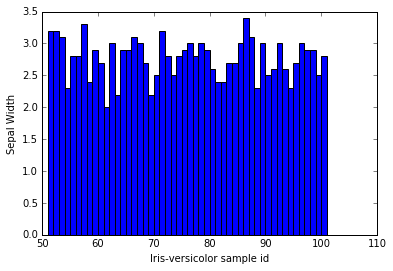

In [155]:
q=a.loc[a['Species'] == "Iris-versicolor"]
print("Mean : ",statistics.mean(q["SepalWidthCm"]))
print("Median : ",statistics.median(q["SepalWidthCm"]))
print("Mode : ",statistics.mode(q["SepalWidthCm"]))
s=0
for i in q["SepalWidthCm"]:
    s=s+pow((i-statistics.mean(q["SepalWidthCm"])),2)
print("Variance : ",(s/50))
print("Standard Deviation : ",pow((s/50),0.5))
print(q["SepalWidthCm"].value_counts())
xx=[x for x in range(51,101)]
plt.bar(xx,q["SepalWidthCm"],width=1,color="blue")
plt.ylabel("Sepal Width")
plt.xlabel("Iris-versicolor sample id")
plt.show()

As we can see from the above information, the mean sepal width is 2.77 cm, median sepal width is 2.8 cm and the modal length is 3.0 cm.

### Relation between Petal length and Iris-versicolor

Mean :  4.26
Median :  4.35
Mode :  4.5
Variance :  0.2164
Standard Deviation :  0.465188133985
4.5    7
4.7    5
4.0    5
4.2    4
4.4    4
3.9    3
4.1    3
4.6    3
4.8    2
4.3    2
4.9    2
3.5    2
3.3    2
5.1    1
3.8    1
3.7    1
3.6    1
3.0    1
5.0    1
Name: PetalLengthCm, dtype: int64


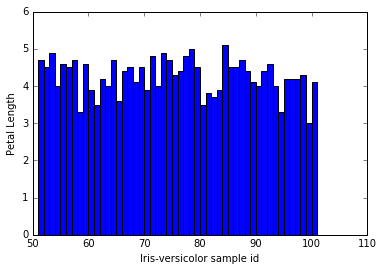

In [156]:
q=a.loc[a['Species'] == "Iris-versicolor"]
print("Mean : ",statistics.mean(q["PetalLengthCm"]))
print("Median : ",statistics.median(q["PetalLengthCm"]))
print("Mode : ",statistics.mode(q["PetalLengthCm"]))
s=0
for i in q["PetalLengthCm"]:
    s=s+pow((i-statistics.mean(q["PetalLengthCm"])),2)
print("Variance : ",(s/50))
print("Standard Deviation : ",pow((s/50),0.5))
print(q["PetalLengthCm"].value_counts())
xx=[x for x in range(51,101)]
plt.bar(xx,q["PetalLengthCm"],width=1,color="blue")
plt.ylabel("Petal Length")
plt.xlabel("Iris-versicolor sample id")
plt.show()

As we can see from the above information, the mean sepal width is 4.26 cm, median sepal width is 4.35 cm and the modal length is 4.5 cm.

### Relation between Petal width and Iris-versicolor

Mean :  1.326
Median :  1.3
Mode :  1.3
Variance :  0.038324
Standard Deviation :  0.195765165441
1.3    13
1.5    10
1.4     7
1.0     7
1.2     5
1.1     3
1.6     3
1.8     1
1.7     1
Name: PetalWidthCm, dtype: int64


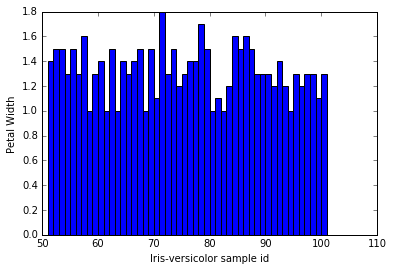

In [157]:
a.loc[a['Species'] == "Iris-versicolor"]
print("Mean : ",statistics.mean(q["PetalWidthCm"]))
print("Median : ",statistics.median(q["PetalWidthCm"]))
print("Mode : ",statistics.mode(q["PetalWidthCm"]))
s=0
for i in q["PetalWidthCm"]:
    s=s+pow((i-statistics.mean(q["PetalWidthCm"])),2)
print("Variance : ",(s/50))
print("Standard Deviation : ",pow((s/50),0.5))
print(q["PetalWidthCm"].value_counts())
xx=[x for x in range(51,101)]
plt.bar(xx,q["PetalWidthCm"],width=1,color="blue")
plt.ylabel("Petal Width")
plt.xlabel("Iris-versicolor sample id")
plt.show()

As we can see from the above information, the mean sepal width is 1.326 cm, median sepal width is 1.3 cm and the modal length is 1.3 cm.

### Relation between Sepal length and Iris-virginica

Mean :  6.588
Median :  6.5
Mode :  6.3
Variance :  0.396256
Standard Deviation :  0.629488681391
6.3    6
6.4    5
6.7    5
6.5    4
7.7    4
7.2    3
5.8    3
6.9    3
6.0    2
6.8    2
6.1    2
6.2    2
5.6    1
7.6    1
4.9    1
7.1    1
7.4    1
5.7    1
7.9    1
7.3    1
5.9    1
Name: SepalLengthCm, dtype: int64


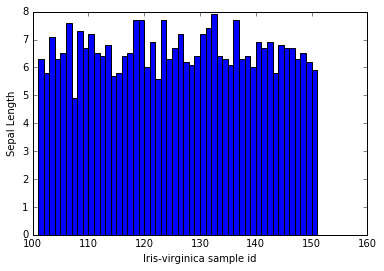

In [158]:
q=a.loc[a['Species'] == "Iris-virginica"]
print("Mean : ",statistics.mean(q["SepalLengthCm"]))
print("Median : ",statistics.median(q["SepalLengthCm"]))
print("Mode : ",statistics.mode(q["SepalLengthCm"]))
s=0
for i in q["SepalLengthCm"]:
    s=s+pow((i-statistics.mean(q["SepalLengthCm"])),2)
print("Variance : ",(s/50))
print("Standard Deviation : ",pow((s/50),0.5))
print(q["SepalLengthCm"].value_counts())
xx=[x for x in range(101,151)]	
plt.bar(xx,q["SepalLengthCm"],width=1,color="blue")
plt.ylabel("Sepal Length")
plt.xlabel("Iris-virginica sample id")
plt.show()

As we can see from the above information, the mean sepal width is 6.588 cm, median sepal width is 6.5 cm and the modal length is 6.3 cm.

### Relation between Sepal width and Iris-virginica

Mean :  2.974
Median :  3.0
Mode :  3.0
Variance :  0.101924
Standard Deviation :  0.319255383666
3.0    12
2.8     8
3.2     5
2.7     4
3.1     4
2.5     4
3.3     3
2.6     2
3.4     2
2.9     2
3.8     2
3.6     1
2.2     1
Name: SepalWidthCm, dtype: int64


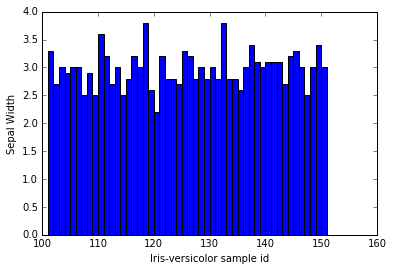

In [159]:
q=a.loc[a['Species'] == "Iris-virginica"]
print("Mean : ",statistics.mean(q["SepalWidthCm"]))
print("Median : ",statistics.median(q["SepalWidthCm"]))
print("Mode : ",statistics.mode(q["SepalWidthCm"]))
s=0
for i in q["SepalWidthCm"]:
    s=s+pow((i-statistics.mean(q["SepalWidthCm"])),2)
print("Variance : ",(s/50))
print("Standard Deviation : ",pow((s/50),0.5))
print(q["SepalWidthCm"].value_counts())
xx=[x for x in range(101,151)]	
plt.bar(xx,q["SepalWidthCm"],width=1,color="blue")
plt.ylabel("Sepal Width")
plt.xlabel("Iris-versicolor sample id")
plt.show()

As we can see from the above information, the mean sepal width is 2.974 cm, median sepal width is 3.0 cm and the modal length is 3.0 cm.

### Relation between petal length and Iris-virginica

Mean :  5.552
Median :  5.55
Mode :  5.1
Variance :  0.298496
Standard Deviation :  0.546347874527
5.1    7
5.6    6
5.5    3
5.0    3
4.9    3
5.8    3
6.1    3
5.7    3
4.8    2
5.2    2
5.9    2
6.0    2
5.4    2
6.7    2
5.3    2
6.4    1
6.3    1
6.9    1
4.5    1
6.6    1
Name: PetalLengthCm, dtype: int64


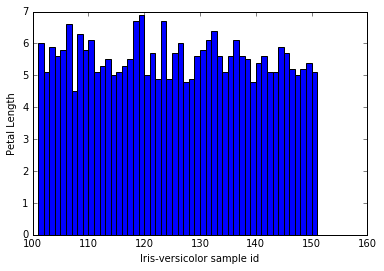

In [160]:
q=a.loc[a['Species'] == "Iris-virginica"]
print("Mean : ",statistics.mean(q["PetalLengthCm"]))
print("Median : ",statistics.median(q["PetalLengthCm"]))
print("Mode : ",statistics.mode(q["PetalLengthCm"]))
s=0
for i in q["PetalLengthCm"]:
    s=s+pow((i-statistics.mean(q["PetalLengthCm"])),2)
print("Variance : ",(s/50))
print("Standard Deviation : ",pow((s/50),0.5))
print(q["PetalLengthCm"].value_counts())
xx=[x for x in range(101,151)]	
plt.bar(xx,q["PetalLengthCm"],width=1,color="blue")
plt.ylabel("Petal Length")
plt.xlabel("Iris-versicolor sample id")
plt.show()

As we can see from the above information, the mean sepal width is 5.552 cm, median sepal width is 5.55 cm and the modal length is 5.1 cm.

### Relation between Petal width and Iris-virginica

Mean :  2.026
Median :  2.0
Mode :  1.8
Variance :  0.073924
Standard Deviation :  0.271889683512
1.8    11
2.3     8
2.1     6
2.0     6
1.9     5
2.4     3
2.2     3
2.5     3
1.5     2
1.6     1
1.7     1
1.4     1
Name: PetalWidthCm, dtype: int64


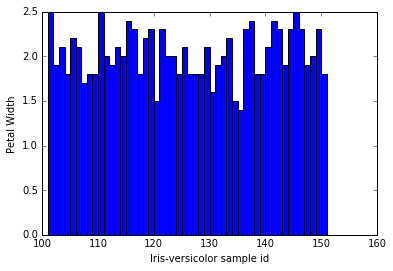

In [161]:
q=a.loc[a['Species'] == "Iris-virginica"]
print("Mean : ",statistics.mean(q["PetalWidthCm"]))
print("Median : ",statistics.median(q["PetalWidthCm"]))
print("Mode : ",statistics.mode(q["PetalWidthCm"]))
s=0
for i in q["PetalWidthCm"]:
    s=s+pow((i-statistics.mean(q["PetalWidthCm"])),2)
print("Variance : ",(s/50))
print("Standard Deviation : ",pow((s/50),0.5))
print(q["PetalWidthCm"].value_counts())
xx=[x for x in range(101,151)]
plt.bar(xx,q["PetalWidthCm"],width=1,color="blue")
plt.ylabel("Petal Width")
plt.xlabel("Iris-versicolor sample id")
plt.show()

As we can see from the above information, the mean sepal width is 2.026 cm, median sepal width is 2.0 cm and the modal length is 1.8 cm.

# Results

### Table for Iris-setosa

In [164]:
print(tabulate([["Mean",5.006,3.418,1.464,0.244],["Median",5.0,3.4,1.5,0.2],["Mode","5.0,5.1",3.4,1.5,0.2],["Variance",0.121764,0.142276,0.029504,0.011264],["Standard Deviation", 0.348946987378,0.377194909828, 0.171767284429,0.106131993291]], headers=[" ","Sepal length","Sepal Width","Petal Length","Petal Width"],tablefmt='orgtbl'))

|                    | Sepal length   |   Sepal Width |   Petal Length |   Petal Width |
|--------------------+----------------+---------------+----------------+---------------|
| Mean               | 5.006          |      3.418    |       1.464    |      0.244    |
| Median             | 5.0            |      3.4      |       1.5      |      0.2      |
| Mode               | 5.0,5.1        |      3.4      |       1.5      |      0.2      |
| Variance           | 0.121764       |      0.142276 |       0.029504 |      0.011264 |
| Standard Deviation | 0.348946987378 |      0.377195 |       0.171767 |      0.106132 |


### Table for Iris-versicolor

In [165]:
print(tabulate([["Mean",5.936,2.77,4.26,1.326],["Median",5.9,2.8,4.35,1.3],["Mode","5.5,5.6,5.7",3.0,4.5,1.3],["Variance",0.261104,0.0965,0.2164,0.038324],["Standard Deviation",0.510983,0.310644,0.465188,0.195765]], headers=[" ","Sepal length","Sepal Width","Petal Length","Petal Width"],tablefmt='orgtbl'))

|                    | Sepal length   |   Sepal Width |   Petal Length |   Petal Width |
|--------------------+----------------+---------------+----------------+---------------|
| Mean               | 5.936          |      2.77     |       4.26     |      1.326    |
| Median             | 5.9            |      2.8      |       4.35     |      1.3      |
| Mode               | 5.5,5.6,5.7    |      3        |       4.5      |      1.3      |
| Variance           | 0.261104       |      0.0965   |       0.2164   |      0.038324 |
| Standard Deviation | 0.510983       |      0.310644 |       0.465188 |      0.195765 |


### Table for Iris-virginica 

In [167]:
print(tabulate([["Mean",6.588,2.974,5.552,2.026],["Median",6.5,3.0,5.55,2.0],["Mode",6.3,3.0,5.1,1.8],["Variance",0.396256,0.101924,0.2985,0.07392],["Standard Deviation",0.629488,0.319255,0.54635,0.2718896]], headers=[" ","Sepal length","Sepal Width","Petal Length","Petal Width"],tablefmt='orgtbl'))

|                    |   Sepal length |   Sepal Width |   Petal Length |   Petal Width |
|--------------------+----------------+---------------+----------------+---------------|
| Mean               |       6.588    |      2.974    |        5.552   |       2.026   |
| Median             |       6.5      |      3        |        5.55    |       2       |
| Mode               |       6.3      |      3        |        5.1     |       1.8     |
| Variance           |       0.396256 |      0.101924 |        0.2985  |       0.07392 |
| Standard Deviation |       0.629488 |      0.319255 |        0.54635 |       0.27189 |


## Analysis of the relation between the four properties and the type of flower

From the above analysis and visualizations, we find that there is an appreciable relation of the four parameters with the type of flower formed. The mean and the median of are very close to each other for all the parameters and categories of flowers. Hence the data provided is symmetric. The variance and standard deviation of the all the parameters are in the range (0.05-0.40) and range(0.2-0.5), which means that the spread of the data is less. Thus, all the factors of measurement - mean, median, mode, variance and standard deviation indicates the accuracy of the result and the relation of flower properties with the type of flower is fixed. 

In general, we can assume the following properties for each type of flower : 

#### Iris-setosa
Sepal Length = 5-5.1 cm | | 
Sepal Width = 3.3-3.5 cm | | 
Petal Length = 1.4-1.5 cm | |
Petal Width = 1.3-1.4 cm


#### Iris-versicolor
Sepal Length = 5.5-6 cm | | 
Sepal Width = 2.7-3.1 cm | |
Petal Length = 4.2-4.8 cm | |
Petal Width = 1.3-1.4 cm

#### Iris-virginica
Sepal Length = 6.2-6.6 cm | |
Sepal Width = 2.9-3 cm | |
Petal Length = 5-5.5 cm | |
Petal Width = 1.7-2.1 cm

# Declaration

The above study is the author's original work. All sources has been mentioned, where necessary.

#### Arnab Deka
 
(arnabdeka6@gmail.com)